In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.tsa.statespace import tools 
from statsmodels.tsa import stattools

In [2]:
font = {'size': 12}
matplotlib.rc('font', **font)


def plot_series(X,
                title='Time Series Plot', y_label='X', figsize=(16, 5)):
    """ Plots the time series data X.

    Args:
        X (np.array): Time-series data
        title (str): Title for the figure
        y_label (str): y-label for t he figure 
        figsize (tuple): Size of figure
    """

    fig = plt.figure(figsize=figsize)
    if type(X) == np.ndarray:
        plt.plot(X, linewidth=3)
        plt.xticks(range(0, len(X), 12))
    else:
        X.plot(linewidth=3)

    plt.title(title, fontsize=17)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.legend([y_label])
    plt.grid()

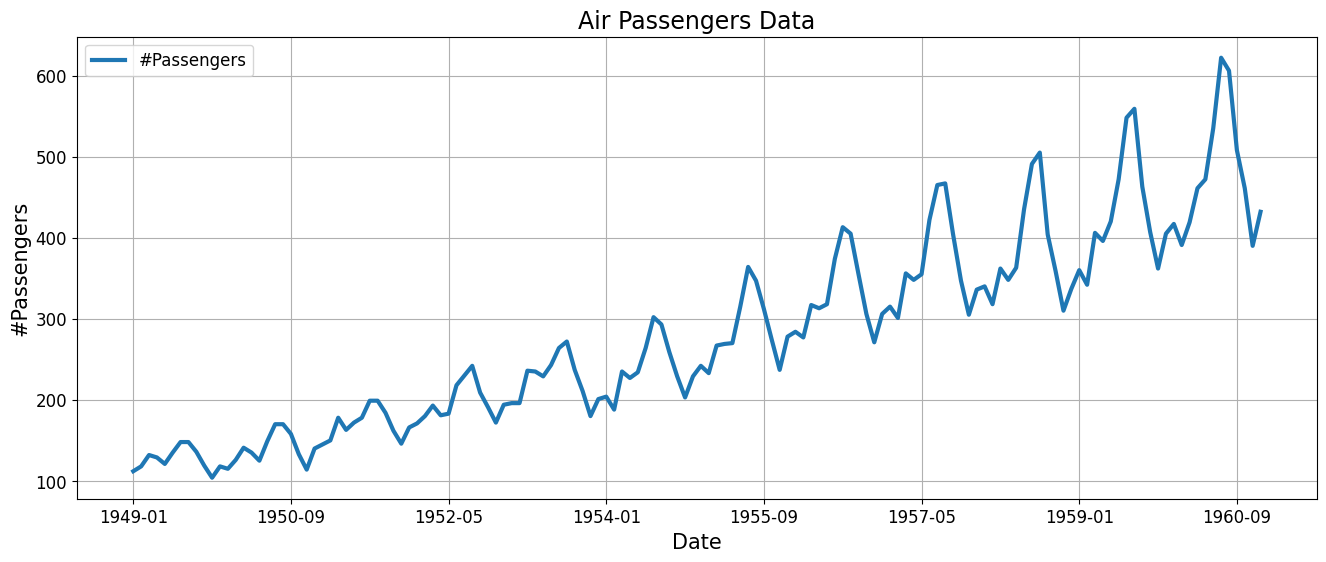

In [4]:
df = pd.read_csv("https://storage.googleapis.com/codehub-data/1-lv2-11-1-AirPassengers.csv",index_col='Month')

plot_series(
    df['#Passengers'], 
    title='Air Passengers Data',
    y_label='#Passengers',
    figsize=(16, 6)
)

In [5]:
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


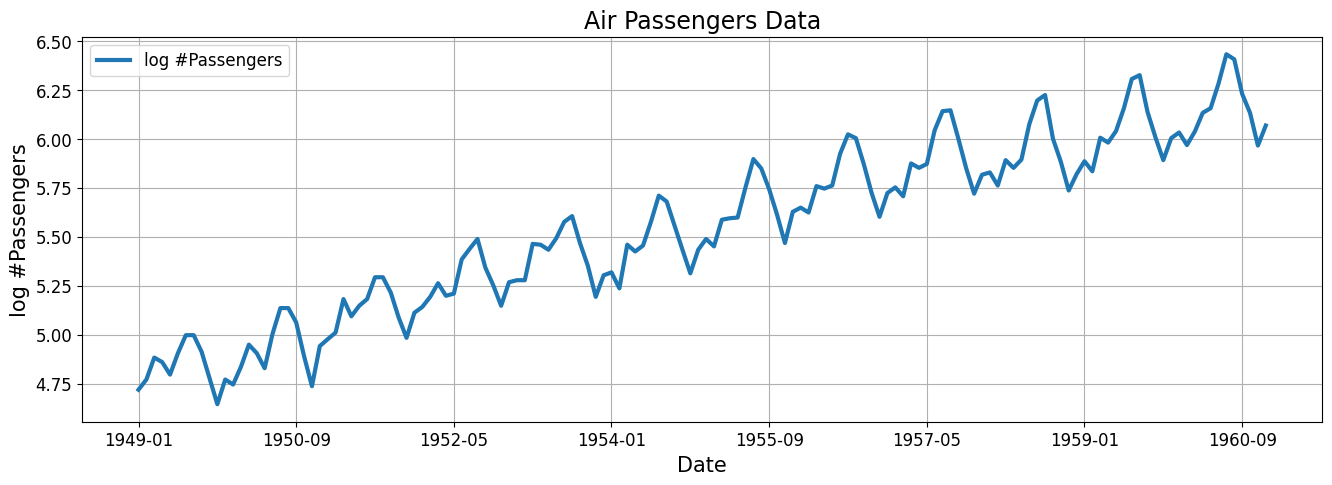

In [8]:
df['log#Passengers'] = np.log(df['#Passengers'].values)

plot_series(
    df['log#Passengers'], 
    title='Air Passengers Data',
    y_label='log #Passengers',
)

In [10]:
df.head()

,#Passengers,log#Passengers
Month,,
1949-01,112,4.718499
1949-02,118,4.770685
1949-03,132,4.882802
1949-04,129,4.859812
1949-05,121,4.795791


[]

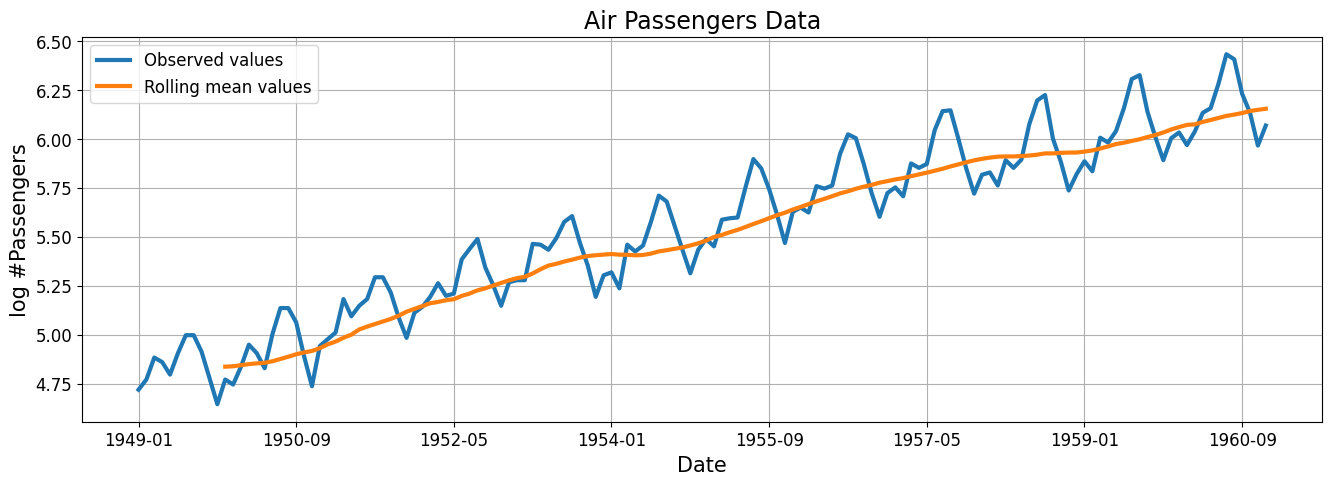

In [13]:
plot_series(
    df['log#Passengers'],
    title='Air Passengers Data',
    y_label='log #Passengers',
)

df['log#Passengers'].rolling(12).mean().plot(linewidth=3)
plt.legend(['Observed values', 'Rolling mean values'])
plt.grid()
plt.xlabel('Date')
plt.plot()

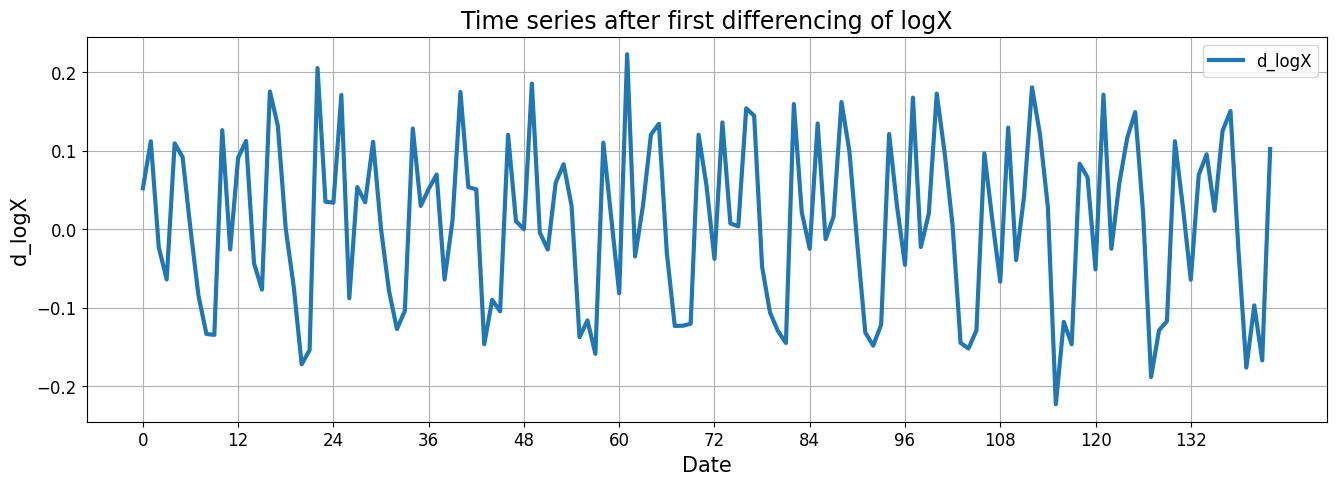

In [14]:
log_X = df['log#Passengers'].values

d_log_X = tools.diff(log_X)

plot_series(
    d_log_X,
    title = 'Time series after first differencing of logX', 
    y_label='d_logX',
)

[]

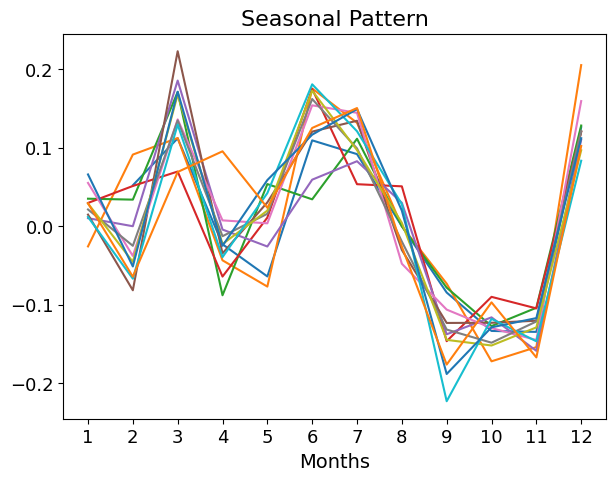

In [15]:
index = pd.DatetimeIndex(df.index) 
df['d_log#Passengers'] = np.concatenate([[np.nan],d_log_X])

pivot = pd.pivot_table(
    df,
    values='d_log#Passengers',
    index=index.month,
    columns=index.year
)

pivot.plot(figsize=(7, 5), fontsize=13)
plt.title('Seasonal Pattern', fontsize=16)
plt.ylabel('', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.xticks(range(1, 13))
plt.legend().remove()
plt.plot()

In [17]:
pivot.head()

Month,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
1,NaN,-0.025752,0.035091,0.029676,0.010257,0.014815,0.055216,0.021353,0.028988,0.011834,0.066021,0.029199
2,0.052186,0.091350,0.033902,0.051293,0.000000,-0.081678,-0.037899,-0.024957,-0.045462,-0.066894,-0.051293,-0.064379
3,0.112117,0.112478,0.171148,0.069733,0.185717,0.223144,0.136210,0.134884,0.167820,0.129593,0.171542,0.069163
4,-0.022990,-0.043485,-0.088033,-0.064193,-0.004246,-0.034635,0.007463,-0.012699,-0.022728,-0.039442,-0.024939,0.095527
5,-0.064022,-0.076961,0.053744,0.010989,-0.025864,0.030371,0.003711,0.015848,0.019915,0.042200,0.058841,0.023581


/tmp/ipykernel_56979/1446521686.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(autocorrelations,  use_line_collection=True)


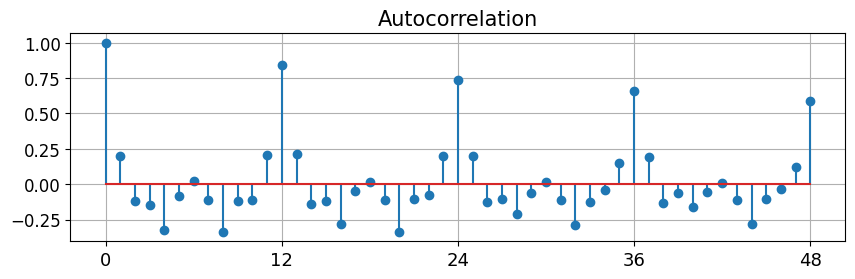

In [18]:
autocorrelations = stattools.acf(d_log_X, nlags=48, fft=False)
fig = plt.figure(figsize=(10, 2.7))
plt.stem(autocorrelations,  use_line_collection=True)
plt.title('Autocorrelation', fontsize=15)
plt.xticks(range(0, 49, 12), fontsize=13)
plt.grid()
plt.show()

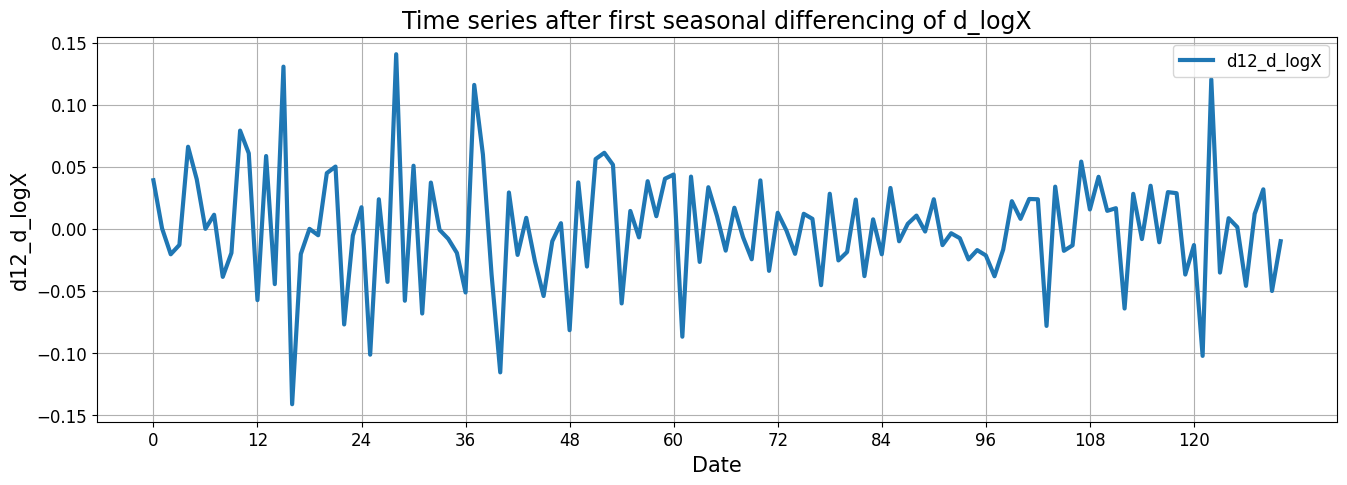

In [19]:
d12_d_log_X = tools.diff(
    d_log_X, 
    k_diff=0, 
    k_seasonal_diff=1, 
    seasonal_periods=12
)

plot_series(
    d12_d_log_X,
    title = 'Time series after first seasonal differencing of d_logX', 
    y_label='d12_d_logX',
)

In [20]:
p_value = stattools.adfuller(d12_d_log_X)[1]
p_value

0.00024859123113839883

In [22]:
p_value < 0.05

True

In [23]:
p_value = stattools.adfuller(log_X)[1]
p_value

0.4223667747703909

In [24]:
p_value < 0.05

False